In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import csv
from pylab import *
from matplotlib import gridspec
import datetime
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from matplotlib import gridspec
cdict = {'red': ((0.0, 1.0, 1.0),
                 (0.125, 1.0, 1.0),
                 (0.25, 1.0, 1.0),
                 (0.5625, 1.0, 1.0),
                 (1.0, 0.0, 0.0)),
         'green': ((0.0, 0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.5625, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),
         'blue': ((0.0, 0.0, 0.0),
                  (0.5, 0.0, 0.0),
                  (1.0, 0.0, 0.0))}
my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)
%matplotlib inline

In [2]:
import pickle
(samples,labels) = pickle.load( open( "data_new.p", "rb" ) )


print(samples.shape)
print(labels.shape)

(73014, 10, 5, 9)
(73014,)


In [3]:
from sklearn.utils import shuffle
def class_balance(samples,labels):
    samples0 = samples[labels==0,:,:,:]
    samples1 = samples[labels==1,:,:,:]
    selected = np.random.choice(len(samples0), len(samples1), replace=False)
    samples0 = samples0[selected,:,:,:]
    labels0 = np.zeros((len(samples0)))
    labels1 = np.ones((len(samples1)))
    samples = np.concatenate((samples0,samples1),axis=0)
    labels = np.concatenate((labels0,labels1),axis=0)
    samples, labels = shuffle(samples, labels)
    return samples, labels
def one_hot(labels):
    one_hot_labels = np.zeros((labels.shape[0],2))
    one_hot_labels[labels==0,0]=1
    one_hot_labels[labels==1,1]=1
    return one_hot_labels


samples, labels = class_balance(samples,labels)

from sklearn.model_selection import train_test_split
samples, samples_rest, labels, labels_rest = \
train_test_split(samples, labels, test_size=0.3, random_state=0)
samples_validation, samples_test, labels_validation, labels_test = \
train_test_split(samples_rest, labels_rest, test_size=0.5, random_state=0)

one_hot_labels = one_hot(labels)
one_hot_labels_validation = one_hot(labels_validation)
one_hot_labels_test = one_hot(labels_test)

print(samples.shape)
print(one_hot_labels.shape)
print(samples_validation.shape)
print(one_hot_labels_validation.shape)
print(samples_test.shape)
print(one_hot_labels_test.shape)


(11088, 10, 5, 9)
(11088, 2)
(2376, 10, 5, 9)
(2376, 2)
(2376, 10, 5, 9)
(2376, 2)


In [4]:
def MinMax_Normalization(samples):
    samples_shape = samples.shape
    samples = np.reshape(samples,(samples_shape[0],samples_shape[1]*samples_shape[2]*samples_shape[3]))
    scaler = MinMaxScaler().fit(samples)
    samples_normalized = scaler.transform(samples)
    samples_normalized = np.reshape(samples_normalized,(samples_shape[0],samples_shape[1],samples_shape[2],samples_shape[3]))
    return samples_normalized, scaler

def transfer_scale(samples,scaler):
    samples_shape = samples.shape
    samples = np.reshape(samples,(samples_shape[0],samples_shape[1]*samples_shape[2]*samples_shape[3]))
    samples_normalized = scaler.transform(samples)
    samples_normalized = np.reshape(samples_normalized,(samples_shape[0],samples_shape[1],samples_shape[2],samples_shape[3]))
    return samples_normalized
    
samples_scaled, scaler = MinMax_Normalization(samples)
samples_scaled_validation = transfer_scale(samples_validation,scaler)
samples_scaled_test = transfer_scale(samples_test,scaler)

In [5]:
def feature_select(samples_scaled,features):
    return samples_scaled[:,:,:,features]

features = [0,1,2,7,8]
samples_scaled = feature_select(samples_scaled,features)
samples_scaled_validation = feature_select(samples_scaled_validation,features)
samples_scaled_test = feature_select(samples_scaled_test,features)
print(samples_scaled.shape)
print(samples_scaled_validation.shape)
print(samples_scaled_test.shape)

(11088, 10, 5, 5)
(2376, 10, 5, 5)
(2376, 10, 5, 5)


In [6]:
from keras.models import Sequential
from keras.layers import Reshape, Dense, Convolution2D, Deconvolution2D, Flatten, Input, Dropout, MaxPooling2D, Activation
from keras.models import model_from_json
from keras.activations import relu, softmax, linear
from keras.layers.advanced_activations import PReLU
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import ELU

Using TensorFlow backend.


Train on 11088 samples, validate on 2376 samples
Epoch 1/100
1s - loss: 0.6056 - acc: 0.6693 - val_loss: 0.5889 - val_acc: 0.6806
Epoch 2/100
0s - loss: 0.5778 - acc: 0.6935 - val_loss: 0.5925 - val_acc: 0.6772
Epoch 3/100
0s - loss: 0.5742 - acc: 0.6959 - val_loss: 0.5888 - val_acc: 0.6831
Epoch 4/100
0s - loss: 0.5694 - acc: 0.7012 - val_loss: 0.5800 - val_acc: 0.6961
Epoch 5/100
0s - loss: 0.5672 - acc: 0.7048 - val_loss: 0.5877 - val_acc: 0.7003
Epoch 6/100
0s - loss: 0.5634 - acc: 0.7057 - val_loss: 0.5852 - val_acc: 0.6860
Epoch 7/100
0s - loss: 0.5629 - acc: 0.7093 - val_loss: 0.5847 - val_acc: 0.6852
Epoch 8/100
0s - loss: 0.5612 - acc: 0.7043 - val_loss: 0.5843 - val_acc: 0.6822
Epoch 9/100
0s - loss: 0.5582 - acc: 0.7047 - val_loss: 0.5782 - val_acc: 0.7016
Epoch 10/100
0s - loss: 0.5577 - acc: 0.7082 - val_loss: 0.5765 - val_acc: 0.7020
Epoch 11/100
0s - loss: 0.5542 - acc: 0.7146 - val_loss: 0.5816 - val_acc: 0.6776
Epoch 12/100
0s - loss: 0.5516 - acc: 0.7130 - val_loss: 0

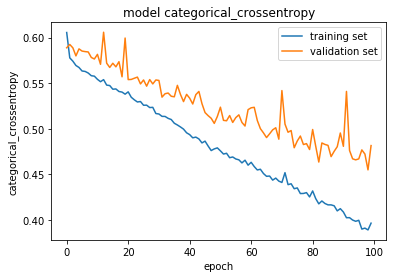

In [19]:
# deep CNN model

model = Sequential()
# 10*5*5
model.add(Convolution2D(16, 3, 3,input_shape=(10, 5, 5),border_mode='valid'))
model.add(ELU())
# 8*3*16
model.add(Convolution2D(32, 3, 3,border_mode='valid'))
model.add(ELU())
# 6*1*32
model.add(Flatten())
# 192
model.add(Dense(64))
model.add(ELU())
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

history_object = model.fit(samples_scaled, one_hot_labels, \
                           validation_data=(samples_scaled_validation, one_hot_labels_validation), \
                           nb_epoch=100, batch_size=64, verbose=2)

### plot the training and validation loss for each epoch
fig = plt.figure(figsize=(15,11))
gs = gridspec.GridSpec(2, 1, wspace=0.2, hspace=0.2)
ax0 = plt.subplot(gs[0])
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
ax1 = plt.subplot(gs[1])
plt.plot(history_object.history['acc'])
plt.plot(history_object.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
fig.savefig('train_history.png', bbox_inches='tight')


from keras.models import load_model
model.save('model.h5')

In [9]:
# deep ANN model

model = Sequential()
model.add(Flatten(input_shape=(10, 5, 5)))
# 192
model.add(Dense(64))
model.add(ELU())
model.add(Dense(32))
model.add(ELU())
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

history_object = model.fit(samples_scaled, one_hot_labels, nb_epoch=10, batch_size=64, verbose=1)

Epoch 1/10
11088/11088 [==============================] - 0s - loss: 0.6030 - acc: 0.6678     
Epoch 2/10
11088/11088 [==============================] - 0s - loss: 0.5740 - acc: 0.6963     
Epoch 3/10
11088/11088 [==============================] - 0s - loss: 0.5664 - acc: 0.7047     
Epoch 4/10
11088/11088 [==============================] - 0s - loss: 0.5586 - acc: 0.7119     
Epoch 5/10
11088/11088 [==============================] - 0s - loss: 0.5567 - acc: 0.7079     
Epoch 6/10
11088/11088 [==============================] - 0s - loss: 0.5547 - acc: 0.7134     
Epoch 7/10
11088/11088 [==============================] - 0s - loss: 0.5521 - acc: 0.7163     
Epoch 8/10
11088/11088 [==============================] - 0s - loss: 0.5523 - acc: 0.7158     
Epoch 9/10
11088/11088 [==============================] - 0s - loss: 0.5500 - acc: 0.7183     
Epoch 10/10
11088/11088 [==============================] - 0s - loss: 0.5477 - acc: 0.7187     


In [ ]:
model.predict(samples_scaled[1:10,:,:,:])

In [ ]:
def data_for_shallow(samples_scaled):
    num_features = samples_scaled.shape[3]
    pave_condition1 = samples_scaled[:,:,:,num_features-2]
    pave_condition1 = np.reshape(pave_condition1,(pave_condition1.shape[0],pave_condition1.shape[1]*pave_condition1.shape[2]))
    pave_condition1 = np.sum(pave_condition1,axis = 1)
    pave_condition1[pave_condition1>0]=1
    pave_condition1 = np.reshape(pave_condition1,(pave_condition1.shape[0],1))
    pave_condition2 = samples_scaled[:,:,:,num_features-1]
    pave_condition2 = np.reshape(pave_condition2,(pave_condition2.shape[0],pave_condition2.shape[1]*pave_condition2.shape[2]))
    pave_condition2 = np.sum(pave_condition2,axis = 1)
    pave_condition2[pave_condition2>0]=1
    pave_condition2 = np.reshape(pave_condition2,(pave_condition2.shape[0],1))
    
    traffic = samples_scaled[:,:,:,:num_features-2]
    data = np.reshape(traffic,(traffic.shape[0],traffic.shape[1]*traffic.shape[2]*traffic.shape[3]))
    data = np.concatenate((data,pave_condition1,pave_condition2),axis=1)
    return data

data_shallow = data_for_shallow(samples_scaled)
data_shallow_validation = data_for_shallow(samples_scaled_validation)
data_shallow_test = data_for_shallow(samples_scaled_test)

In [ ]:
data_shallow.shape

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC()
clf.fit(data_shallow, labels)
pred = clf.predict(data_shallow)
acc = accuracy_score(pred, labels)
pred_validation = clf.predict(data_shallow_validation)
acc_validation = accuracy_score(pred_validation, labels_validation)
pred_test = clf.predict(data_shallow_test)
acc_test = accuracy_score(pred_test, labels_test)
print(acc)
print(acc_validation)
print(acc_test)

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(min_samples_split=2)
clf.fit(data_shallow, labels)
pred = clf.predict(data_shallow)
acc = accuracy_score(pred, labels)
pred_validation = clf.predict(data_shallow_validation)
acc_validation = accuracy_score(pred_validation, labels_validation)
pred_test = clf.predict(data_shallow_test)
acc_test = accuracy_score(pred_test, labels_test)
print(acc)
print(acc_validation)
print(acc_test)